# Network Analysis
## Crime Network Analysis
### Professor - Michele Coscia

This notebook contains all of the code developed for the Network Analysis Course at ITU. We will be using...**finish**

**Add Description**

Group 10:<br>
Crisanna Cornish (ccor@itu.dk)<br>
Danielle Dequin (ddeq@itu.dk)<br>
Moneeca Abru Iftikhar Latif (abml@itu.dk)<br>
Carl August Wismer (cwis@itu.dk)<br>
Sabrina Fonseca Pereira (sabf@itu.dk)<br>
Maria Do Carmo Madeira Santos Silva Passos de Sousa (mdom@itu.dk)

Created: 27-09-2021<br>
Last Modified: 27-09-2021

# Data Source

The data are a network of associations among suspects, victims, and/or witnesses involved in crimes in St. Louis in the 1990s. Data are derived from police records, via snowball sampling from five initial homicides. Left nodes are people, right nodes are crime events, and edges connect people to particular crimes events they were associated with. Metadata includes names, genders, and roles (suspects, victims, and/or witnesses).

There are 1380 nodes and 1476 edges.

Data can be downloaded here: http://konect.cc/networks/moreno_crime/ or https://networks.skewed.de/net/crime .

# Imports

In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter

# PATHS

In [2]:
DATA = '../Data/out.moreno_crime_crime'
ROLE = '../Data/rel.moreno_crime_crime.person.role'
NAME = '../Data/ent.moreno_crime_crime.person.name'
SEX =  '../Data/ent.moreno_crime_crime.person.sex'

# Constants

# Functions

# Load Data

In [3]:
with open(DATA) as f:
    data = f.read().splitlines()
    
with open(ROLE) as f:
    role = f.read().splitlines()
    
with open(NAME) as f:
    name = f.read().splitlines()
    
with open(SEX) as f:
    sex = f.read().splitlines()
    
for i in range(len(data)):
    data[i] = 'p' + data[i] #adds 'p' to the People nodes to differentiate them

In [4]:
B = nx.read_edgelist(data) #read edgelist in
print(len(B.nodes()), len(B.edges())) #sanity check (1380, 1476)

1380 1476


In [5]:
graph = np.loadtxt(DATA)
a = np.unique(graph[:,0]) #people nodes
b = np.unique(graph[:,1]) #crime nodes
a = ['p' + str(int(a)) for a in a] #add string to differentiate
b = [str(int(b)) for b in b] #make string as well - there must be a better way to do this?

print(f"There are {len(a)} unique people and {len(b)} unique crime events")

There are 829 unique people and 551 unique crime events


# Exploratory Data Analysis

In [6]:
G = nx.Graph()
for j in range(len(a)):
    G.add_node(a[j], bipartite=0, data=True, name=name[j], sex=sex[j]) #Add attributes name and sex
print(len(G.nodes())) #sanity check = 829
G.add_nodes_from(b, bipartite=1, data=True)
print(len(G.nodes())-829) #sanity check = 551
len(G.nodes()) #sanity check = 1380

829
551


1380

In [7]:
print(nx.get_node_attributes(G, 'name')['p1']) #check name of person 'p1' = 'AbelDennis'
print(nx.get_node_attributes(G, 'sex')['p1']) #check sex of person 'p1' = '1'

AbelDennis
1


In [8]:
i = 0
for edge in B.edges():
    G.add_edge(edge[0], edge[1], role= [role[i]])
    i+=1

len(G.nodes()), len(G.edges) #sanity check still (1380, 1476!)

(1380, 1476)

In [9]:
nx.get_edge_attributes(G, 'role')['p1', '1']
#check role of edge between person p1 and crime 1 = 'Suspect'

['Suspect']

In [10]:
cluster = bipartite.clustering(B)
sum(cluster.values())/len(cluster.values())

0.4274751302606178

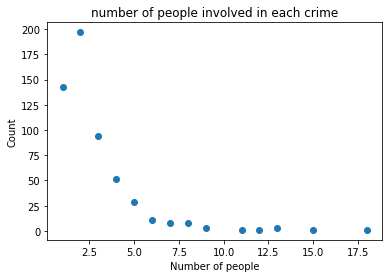

In [11]:
e_p = []
e_c = []
for k in G.nodes():
    if G.nodes[k]["bipartite"] == 0:
        e_p.append(len(G.edges(k)))
    else:
        e_c.append(len(G.edges(k)))

e_cc = Counter(e_c)
plt.scatter(e_cc.keys(), e_cc.values())
plt.title('number of people involved in each crime')
plt.xlabel('Number of people')
plt.ylabel('Count');

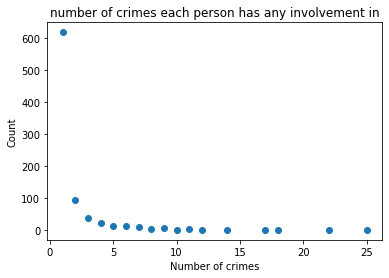

In [12]:
e_pc = Counter(e_p)
plt.scatter(e_pc.keys(), e_pc.values())
plt.title('number of crimes each person has any involvement in')
plt.xlabel('Number of crimes')
plt.ylabel('Count');

In [13]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

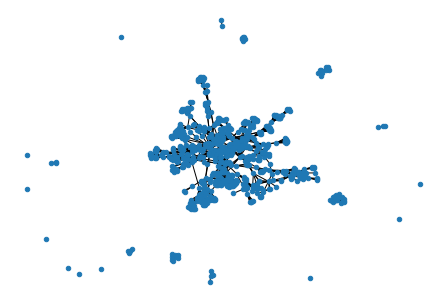

In [14]:
P = bipartite.weighted_projected_graph(G, top_nodes)
nx.draw(P, node_size=20)

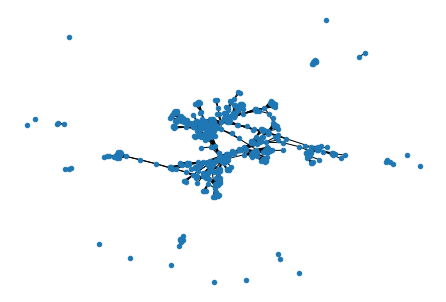

In [15]:
C = bipartite.weighted_projected_graph(G, bottom_nodes)
nx.draw(C, node_size=20)